# Pymaceuticals Inc.
---

### Analysis

When compared to all the other drugs Capomulin and Ramicame appear to have the highest success for reducing tumor size over the mice that where treated with these two specific drugs. They also had the lowest STD which could affect their reliability in a postive manner for future studies

Ketapril looks to have performed the worst when it comes to treating the mice for their tumors. It also had the highest STD which could affect the reliability of the drug in a negative manner when considered for future studies.

the average mass of the tumors in each mice is highly correlated with their average weight. This could be taken into account in the future when attempting to figure out the appropriate dosages for mice in the future.

Overall Dosages do not seem to have been tracked which is vital information that is missing when considering the effectivness of a drug. This should be included in the data in the future when to properly account for the results of each tumor in the future. 
 

In [95]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_data_complete = pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
mouse_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [30]:
# Checking the number of mice.
Totalmice = len(mouse_data_complete["Mouse ID"].value_counts())
Totalmice

249

In [31]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupeIDDF = mouse_data_complete[mouse_data_complete.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
dupeIDlist = dupeIDDF["Mouse ID"].unique()
dupeIDlist


array(['g989'], dtype=object)

In [32]:
# Optional: Get all the data for the duplicate mouse ID. 
dupeIDDF

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [33]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaneddf = mouse_data_complete[mouse_data_complete["Mouse ID"].isin(dupeIDlist)==False]
cleaneddf.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [34]:
# Checking the number of mice in the clean DataFrame.
cleanedTotalmice = len(cleaneddf["Mouse ID"].value_counts())
cleanedTotalmice

248

## Summary Statistics

In [35]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
drugmean = cleaneddf.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
drugmedian = cleaneddf.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
drugvariance = cleaneddf.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
drugstd = cleaneddf.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
drugsem = cleaneddf.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

regimendfstats= pd.concat([drugmean,drugmedian,drugvariance,drugstd,drugsem], axis = 1)
regimendfstats

,Tumor Volume (mm3),Tumor Volume (mm3),Tumor Volume (mm3),Tumor Volume (mm3),Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [36]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
drug = cleaneddf.groupby("Drug Regimen")["Tumor Volume (mm3)"]
# Using the aggregation method, produce the same summary statistics in a single line
regimendfstatsagg = drug.aggregate({"mean", "median", "var", "std", "sem"})
regimendfstatsagg

,sem,median,mean,var,std
Drug Regimen,,,,,
Capomulin,0.329346,41.557809,40.675741,24.947764,4.994774
Ceftamin,0.469821,51.776157,52.591172,39.290177,6.268188
Infubinol,0.492236,51.820584,52.884795,43.128684,6.567243
Ketapril,0.603860,53.698743,55.235638,68.553577,8.279709
Naftisol,0.596466,52.509285,54.331565,66.173479,8.134708
Placebo,0.581331,52.288934,54.033581,61.168083,7.821003
Propriva,0.544332,50.446266,52.320930,43.852013,6.622085
Ramicane,0.320955,40.673236,40.216745,23.486704,4.846308
Stelasyn,0.573111,52.431737,54.233149,59.450562,7.710419


## Bar and Pie Charts

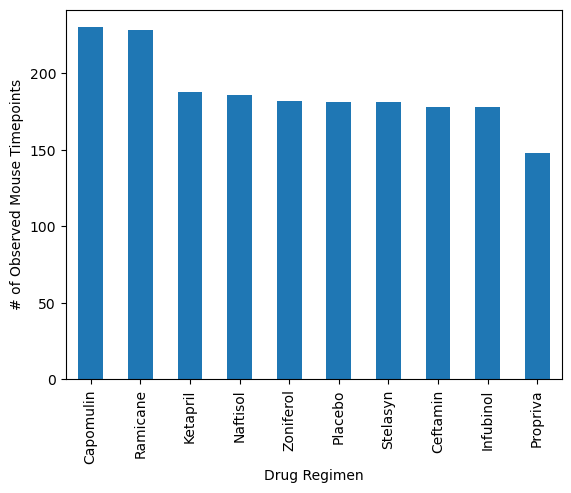

In [37]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drugregimenGb = cleaneddf.groupby("Drug Regimen")["Mouse ID"].count().sort_values(ascending=False) # makes the cleanded DF into a new DF with the amount of mice on each drug and sorts it 
drugregimenGb.plot(kind="bar").set_ylabel("# of Observed Mouse Timepoints")
plt.show()

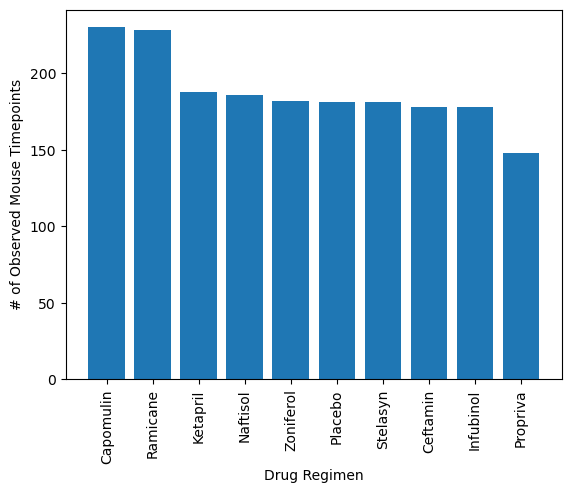

In [38]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drugregimenGbDF = pd.DataFrame(drugregimenGb)
drugregimenGbDF.reset_index(drop=False, inplace=True)
x = drugregimenGbDF["Drug Regimen"]
y = drugregimenGbDF["Mouse ID"]
plt.bar(x,y)
plt.ylabel("# of Observed Mouse Timepoints")
plt.xlabel("Drug Regimen")
plt.xticks(rotation= "vertical")
plt.show()



<Axes: ylabel='Sex'>

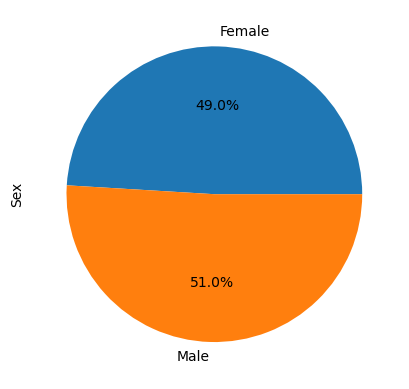

In [40]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sexGP = cleaneddf.groupby("Sex")["Sex"].count()
sexGP.plot(kind="pie", autopct="%1.1f%%")


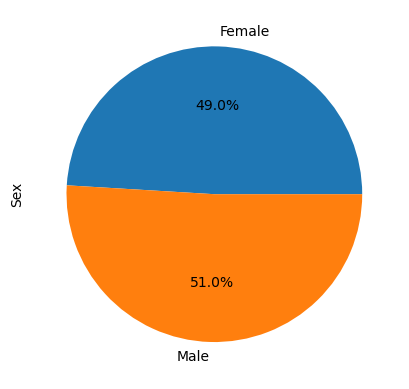

In [50]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sexGPDF= pd.DataFrame(sexGP)
counts= sexGPDF["Sex"].values
index= sexGPDF.index
plt.pie(counts, labels=index, autopct='%1.1f%%')
plt.ylabel("Sex")
plt.show()



## Quartiles, Outliers and Boxplots

In [71]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
capomulinDF= cleaneddf.loc[cleaneddf["Drug Regimen"] == "Capomulin",:]
ramicaneDF= cleaneddf.loc[cleaneddf["Drug Regimen"] == "Ramicane",:]
infubinolDF= cleaneddf.loc[cleaneddf["Drug Regimen"] == "Infubinol",:]
ceftaminDF= cleaneddf.loc[cleaneddf["Drug Regimen"] == "Ceftamin",:]

capomulinLDF = capomulinDF.groupby("Mouse ID")["Timepoint"].max()
ramicaneLDF = ramicaneDF.groupby("Mouse ID")["Timepoint"].max()
infubinolLDF = infubinolDF.groupby("Mouse ID")["Timepoint"].max()
ceftaminLDF = ceftaminDF.groupby("Mouse ID")["Timepoint"].max()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
capomulinLDF = capomulinLDF.reset_index()
ramicaneLDF= ramicaneLDF.reset_index()
infubinolLDF= infubinolLDF.reset_index()
ceftaminLDF= ceftaminLDF.reset_index()

capomulinLDF.rename(columns = {"Timepoint": "Timepoint Max"}, inplace=True)
ramicaneLDF.rename(columns = {"Timepoint": "Timepoint Max"}, inplace=True)
infubinolLDF.rename(columns = {"Timepoint": "Timepoint Max"}, inplace=True)
ceftaminLDF.rename(columns = {"Timepoint": "Timepoint Max"}, inplace=True)

timepointmaxDF= pd.concat([capomulinLDF,ramicaneLDF,infubinolLDF,ceftaminLDF])
timepointmaxDF
# onedf = pd.merge(capomulinLDF, cleaneddf, on= "Mouse ID", how="outer")
# twodf = pd.merge(onedf,ramicaneLDF, on= "Mouse ID", how="outer"  )
# threedf = pd.merge(twodf,infubinolLDF, on= "Mouse ID", how="outer"  )
finalmergedDF = pd.merge(timepointmaxDF,cleaneddf, on= "Mouse ID", how="outer"  )
finalmergedDF

,Mouse ID,Timepoint Max,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45.0,0,45.000000,0,Capomulin,Female,9,22
1,b128,45.0,5,45.651331,0,Capomulin,Female,9,22
2,b128,45.0,10,43.270852,0,Capomulin,Female,9,22
3,b128,45.0,15,43.784893,0,Capomulin,Female,9,22
4,b128,45.0,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...,...
1875,c927,NaN,35,61.872274,3,Propriva,Female,4,26
1876,c927,NaN,40,64.183229,4,Propriva,Female,4,26
1877,l264,NaN,0,45.000000,0,Ketapril,Female,15,30
1878,l264,NaN,5,46.668766,0,Ketapril,Female,15,30


In [78]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
capofinavolume =[]
ramifinalvolume = []
infubinolfinalvolume = []
ceftfinalvolume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for index, row in finalmergedDF.iterrows():
    if row["Timepoint Max"] == row["Timepoint"]:
        if row["Drug Regimen"] =="Capomulin":
            capofinavolume.append(row["Tumor Volume (mm3)"])
        elif row["Drug Regimen"] =="Ramicane":
            ramifinalvolume.append(row["Tumor Volume (mm3)"])
        elif row["Drug Regimen"] =="Infubinol":
            infubinolfinalvolume.append(row["Tumor Volume (mm3)"])
        elif row["Drug Regimen"] =="Ceftamin":
            ceftfinalvolume.append(row["Tumor Volume (mm3)"])

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
finalvDF = pd.DataFrame({"Capomulin": capofinavolume, "Ramicane": ramifinalvolume, "Infubinol": infubinolfinalvolume, "Ceftamin": ceftfinalvolume})

cquartiles =finalvDF["Capomulin"].quantile([.25,.5,.75])
clowerq = cquartiles[0.25]
cupperq = cquartiles[0.75]
ciqr = cupperq-clowerq
clower_bound = clowerq - (1.5*ciqr)
cupper_bound = cupperq + (1.5*ciqr)

rquartiles =finalvDF["Ramicane"].quantile([.25,.5,.75])
rlowerq = rquartiles[0.25]
rupperq = rquartiles[0.75]
riqr = rupperq-rlowerq
rlower_bound = rlowerq - (1.5*riqr)
rupper_bound = rupperq + (1.5*riqr)

iquartiles =finalvDF["Infubinol"].quantile([.25,.5,.75])
ilowerq = iquartiles[0.25]
iupperq = iquartiles[0.75]
iiqr = iupperq-ilowerq
ilower_bound = ilowerq - (1.5*iiqr)
iupper_bound = iupperq + (1.5*iiqr)

cequartiles =finalvDF["Ceftamin"].quantile([.25,.5,.75])
celowerq = cequartiles[0.25]
ceupperq = cequartiles[0.75]
ceiqr = ceupperq-celowerq
celower_bound = celowerq - (1.5*ceiqr)
ceupper_bound = ceupperq + (1.5*ceiqr)
    # add subset 

    
    # Determine outliers using upper and lower bounds


7.781863460000004
32.37735684
40.1592203


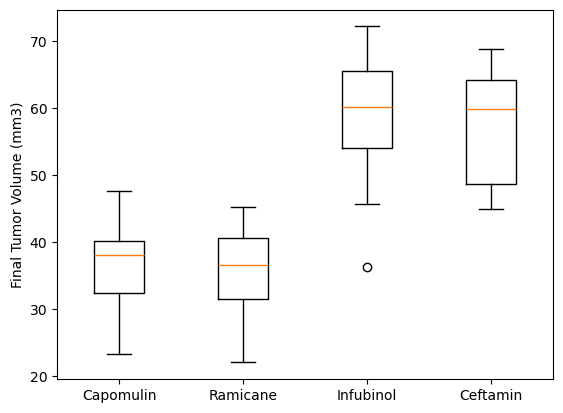

In [80]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
Regimen = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]
#data_to_plot=data_to_plot.values
fig1, ax1 = plt.subplots()
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(finalvDF, labels=Regimen, widths = 0.4, vert=True)
plt.show()

## Line and Scatter Plots

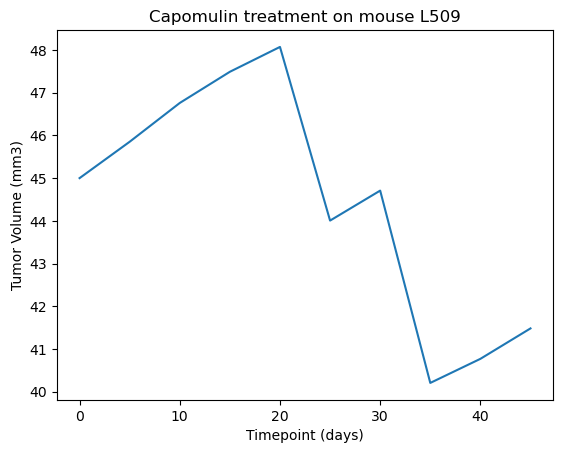

In [92]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
lineplot = cleaneddf.loc[cleaneddf["Mouse ID"]=="l509", :]
x_axis = lineplot["Timepoint"]
y_axis = lineplot["Tumor Volume (mm3)"]

tumor_volume = plt.plot(x_axis, y_axis, label="Timepoint")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment on mouse L509")
plt.show()

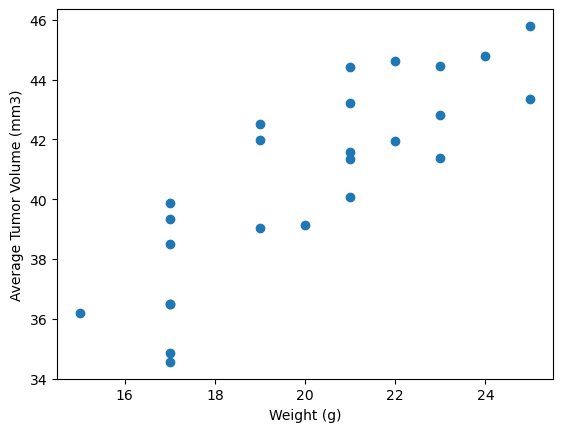

In [93]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulinavgV =capomulinDF.groupby(["Mouse ID"]).mean(numeric_only=True)


plt.scatter(capomulinavgV["Weight (g)"],capomulinavgV["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


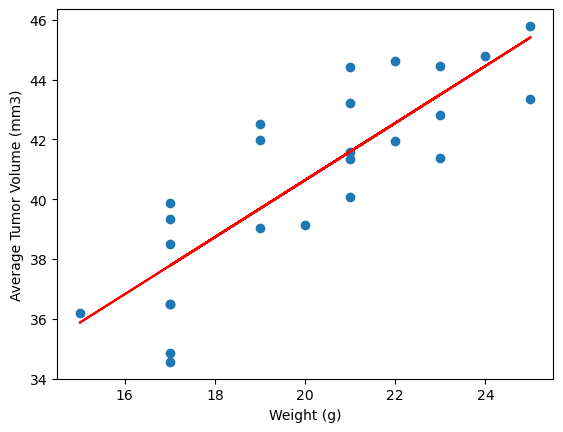

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

#DNF
#DNF
#DNF